In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\sirin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [25]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, UnidentifiedImageError


# Define paths to your dataset
base_dir = "C:/Users/sirin/Downloads/newhandpd"

healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')

# Define the image size and batch size
image_size = (299, 299)  # As required by InceptionV4
batch_size = 32

valid_extensions = {".jpg", ".jpeg", ".png", ".bmp"}

def safe_flow_from_directory(directory, target_size, batch_size, class_mode, shuffle, rescale=1./255):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Check file extension
            if os.path.splitext(file)[-1].lower() not in valid_extensions:
                print(f"Removing non-image file: {file_path}")
                os.remove(file_path)
                continue
            # Verify if the file is a valid image
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (UnidentifiedImageError, IOError):
                print(f"Removing corrupted file: {file_path}")
                os.remove(file_path)

    datagen = ImageDataGenerator(rescale=rescale)
    return datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode,
        shuffle=shuffle
    )


train_generator = safe_flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    rescale=1./255
)
# If you want to visualize the class labels
print(train_generator.class_indices)

Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P1.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P10.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P11.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P12.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P13.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P14.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P16.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOSX\Circle\._circA-P17.jpg
Removing corrupted file: C:/Users/sirin/Downloads/newhandpd\Healthy\HealthyCircle\__MACOS

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
base_dir = "C:/Users/sirin/Downloads/newhandpd"

healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')

# Define the image size and batch size
image_size = (299, 299)  # As required by InceptionV4
batch_size = 32

# ImageDataGenerator for preprocessing (rescaling images)
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values between 0 and 1

# Load data from the directory
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Root folder for the dataset
    target_size=image_size,  # Resize images to 299x299
    batch_size=batch_size,
    class_mode='binary',  # We have two classes: Healthy and Sick
    shuffle=True,  # Shuffle the data to improve training
)

# If you want to visualize the class labels
print(train_generator.class_indices)


Found 1188 images belonging to 2 classes.
{'Healthy': 0, 'Sick': 1}


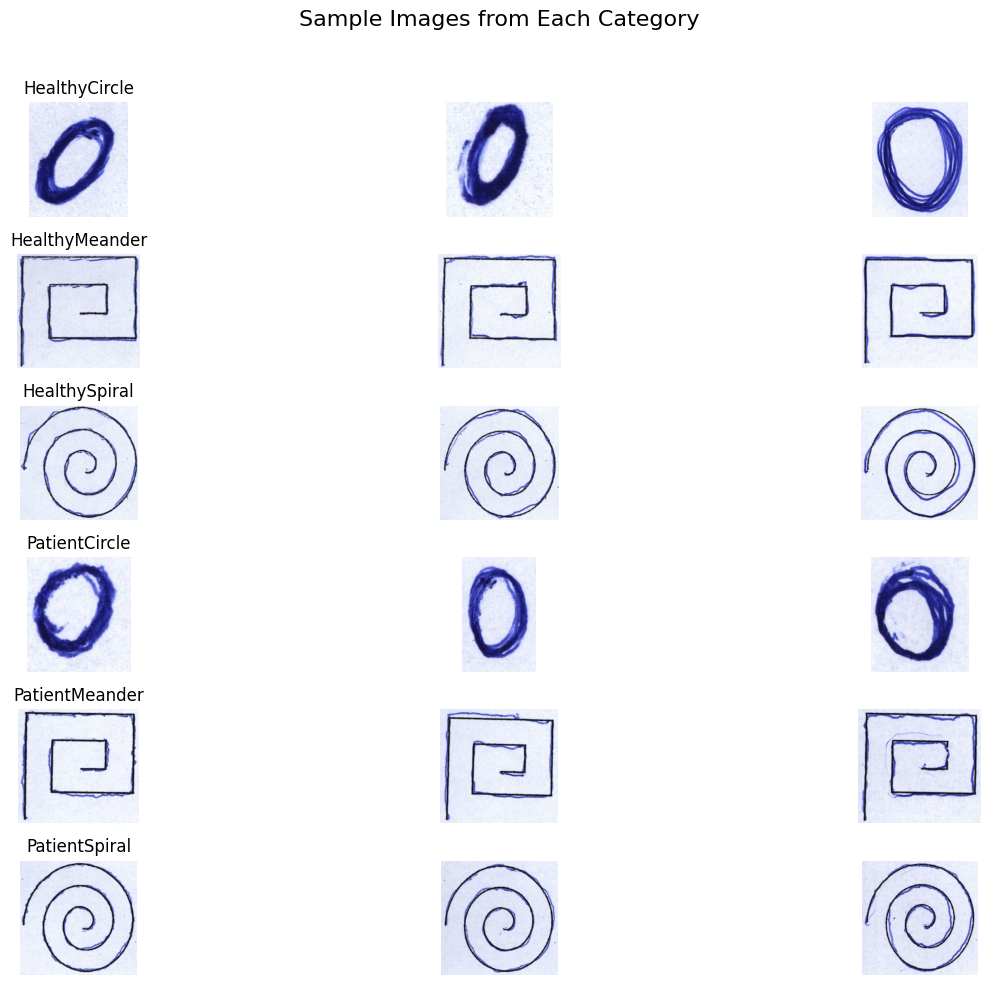

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Base directory for the dataset
base_dir = "C:\\Users\\sirin\\Downloads\\newhandpd"

# Subfolders for categories
categories = {
    'HealthyCircle': os.path.join(base_dir, 'Healthy', 'HealthyCircle', 'Circle'),
    'HealthyMeander': os.path.join(base_dir, 'Healthy', 'HealthyMeander', 'HealthyMeander'),
    'HealthySpiral': os.path.join(base_dir, 'Healthy', 'HealthySpiral', 'HealthySpiral'),
    'PatientCircle': os.path.join(base_dir, 'Sick', 'PatientCircle', 'Circle'),
    'PatientMeander': os.path.join(base_dir, 'Sick', 'PatientMeander', 'PatientMeander'),
    'PatientSpiral': os.path.join(base_dir, 'Sick', 'PatientSpiral', 'PatientSpiral')
}

# Function to filter image files
def is_image_file(filename):
    valid_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.gif']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Function to visualize images
def visualize_images(categories, num_images=3):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))
    fig.suptitle("Sample Images from Each Category", fontsize=16)
    
    for i, (category, path) in enumerate(categories.items()):
        # Filter for valid image files
        images = [img for img in os.listdir(path) if is_image_file(img)][:num_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category, fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the function to visualize images
visualize_images(categories)

In [7]:
from tensorflow.keras import layers, models

def stem_block(input_tensor):
    # Initial convolution layers
    x = layers.Conv2D(32, (3, 3), strides=2, padding='valid', activation='relu')(input_tensor)  # 149x149x32
    x = layers.Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu')(x)  # 147x147x32
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # 147x147x64

    # Branches
    branch_1 = layers.MaxPooling2D((3, 3), strides=2)(x)  # 73x73x64
    branch_2 = layers.Conv2D(96, (3, 3), strides=2, padding='valid', activation='relu')(x)  # 73x73x96
    x = layers.Concatenate()([branch_1, branch_2])  # 73x73x160

    # Additional branches
    branch_3 = layers.Conv2D(64, (1, 1), activation='relu')(x)
    branch_3 = layers.Conv2D(96, (3, 3), padding='valid', activation='relu')(branch_3)  # 71x71x96

    branch_4 = layers.Conv2D(64, (1, 1), activation='relu')(x)
    branch_4 = layers.Conv2D(64, (7, 1), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(64, (1, 7), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(96, (3, 3), padding='valid', activation='relu')(branch_4)  # 71x71x96

    x = layers.Concatenate()([branch_3, branch_4])  # 71x71x192

    branch_5 = layers.Conv2D(192, (3, 3), strides=2, padding='valid', activation='relu')(x)  # 35x35x192
    branch_6 = layers.MaxPooling2D((3, 3), strides=2, padding='valid')(x)  # 35x35x192

    x = layers.Concatenate()([branch_5, branch_6])  # 35x35x384
    return x


In [8]:
def inception_a_block(input_tensor):
    # Branch 1
    branch_1 = layers.AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = layers.Conv2D(96, (1, 1), activation='relu')(branch_1)
    
    # Branch 2
    branch_2 = layers.Conv2D(96, (1, 1), activation='relu')(input_tensor)
    
    # Branch 3
    branch_3 = layers.Conv2D(64, (1, 1), activation='relu')(input_tensor)
    branch_3 = layers.Conv2D(96, (3, 3), padding='same', activation='relu')(branch_3)
    
    # Branch 4
    branch_4 = layers.Conv2D(64, (1, 1), activation='relu')(input_tensor)
    branch_4 = layers.Conv2D(96, (3, 3), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(96, (3, 3), padding='same', activation='relu')(branch_4)
    
    # Concatenate all branches
    x = layers.Concatenate()([branch_1, branch_2, branch_3, branch_4])
    return x


In [9]:
def reduction_a_block(input_tensor):
    # Branch 1
    branch_1 = layers.MaxPooling2D((3, 3), strides=2, padding='valid')(input_tensor)
    
    # Branch 2
    branch_2 = layers.Conv2D(384, (3, 3), strides=2, padding='valid', activation='relu')(input_tensor)
    
    # Branch 3
    branch_3 = layers.Conv2D(192, (1, 1), activation='relu')(input_tensor)
    branch_3 = layers.Conv2D(224, (3, 3), padding='same', activation='relu')(branch_3)
    branch_3 = layers.Conv2D(256, (3, 3), strides=2, padding='valid', activation='relu')(branch_3)
    
    # Concatenate all branches
    x = layers.Concatenate()([branch_1, branch_2, branch_3])
    return x


In [10]:
def inception_b_block(input_tensor):
    # Branch 1
    branch_1 = layers.AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = layers.Conv2D(128, (1, 1), activation='relu')(branch_1)
    
    # Branch 2
    branch_2 = layers.Conv2D(384, (1, 1), activation='relu')(input_tensor)
    
    # Branch 3
    branch_3 = layers.Conv2D(192, (1, 1), activation='relu')(input_tensor)
    branch_3 = layers.Conv2D(224, (1, 7), padding='same', activation='relu')(branch_3)
    branch_3 = layers.Conv2D(256, (7, 1), padding='same', activation='relu')(branch_3)
    
    # Branch 4
    branch_4 = layers.Conv2D(192, (1, 1), activation='relu')(input_tensor)
    branch_4 = layers.Conv2D(192, (1, 7), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(224, (7, 1), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(224, (1, 7), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(256, (7, 1), padding='same', activation='relu')(branch_4)
    
    # Concatenate all branches
    x = layers.Concatenate()([branch_1, branch_2, branch_3, branch_4])
    return x


In [11]:
def reduction_b_block(input_tensor):
    # Branch 1
    branch_1 = layers.MaxPooling2D((3, 3), strides=2, padding='valid')(input_tensor)
    
    # Branch 2
    branch_2 = layers.Conv2D(192, (1, 1), activation='relu')(input_tensor)
    branch_2 = layers.Conv2D(192, (3, 3), strides=2, padding='valid', activation='relu')(branch_2)
    
    # Branch 3
    branch_3 = layers.Conv2D(256, (1, 1), activation='relu')(input_tensor)
    branch_3 = layers.Conv2D(256, (1, 7), padding='same', activation='relu')(branch_3)
    branch_3 = layers.Conv2D(320, (7, 1), padding='same', activation='relu')(branch_3)
    branch_3 = layers.Conv2D(320, (3, 3), strides=2, padding='valid', activation='relu')(branch_3)
    
    # Concatenate all branches
    x = layers.Concatenate()([branch_1, branch_2, branch_3])
    return x


In [12]:
def inception_c_block(input_tensor):
    # Branch 1
    branch_1 = layers.AveragePooling2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_1 = layers.Conv2D(256, (1, 1), activation='relu')(branch_1)
    
    # Branch 2
    branch_2 = layers.Conv2D(256, (1, 1), activation='relu')(input_tensor)
    
    # Branch 3
    branch_3 = layers.Conv2D(384, (1, 1), activation='relu')(input_tensor)
    branch_3_a = layers.Conv2D(256, (1, 3), padding='same', activation='relu')(branch_3)
    branch_3_b = layers.Conv2D(256, (3, 1), padding='same', activation='relu')(branch_3)
    branch_3 = layers.Concatenate()([branch_3_a, branch_3_b])
    
    # Branch 4
    branch_4 = layers.Conv2D(384, (1, 1), activation='relu')(input_tensor)
    branch_4 = layers.Conv2D(448, (3, 1), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Conv2D(512, (1, 3), padding='same', activation='relu')(branch_4)
    branch_4_a = layers.Conv2D(256, (1, 3), padding='same', activation='relu')(branch_4)
    branch_4_b = layers.Conv2D(256, (3, 1), padding='same', activation='relu')(branch_4)
    branch_4 = layers.Concatenate()([branch_4_a, branch_4_b])
    
    # Concatenate all branches
    x = layers.Concatenate()([branch_1, branch_2, branch_3, branch_4])
    return x


In [13]:
def inception_v4_binary(input_shape=(299, 299, 3)):
    input_tensor = layers.Input(shape=input_shape)
    
    # Stem
    x = stem_block(input_tensor)
    
    # 4x Inception-A
    for _ in range(4):
        x = inception_a_block(x)
    
    # Reduction-A
    x = reduction_a_block(x)
    
    # 7x Inception-B
    for _ in range(7):
        x = inception_b_block(x)
    
    # Reduction-B
    x = reduction_b_block(x)
    
    # 3x Inception-C
    for _ in range(3):
        x = inception_c_block(x)
    
    # Average Pooling
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)  # Keep probability of 0.8 (1 - 0.2)
    
    # Fully Connected Layer for Binary Classification
    output = layers.Dense(1, activation='sigmoid')(x)  # Use 1 output neuron with sigmoid for binary classification
    
    model = models.Model(inputs=input_tensor, outputs=output)
    return model

# Instantiate the binary classification model
model = inception_v4_binary()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,248 │ conv2d_94[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,496 │ conv2d_95[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ conv2d_96[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │     55,392 │ conv2d_96[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 73, 73,    │          0 │ max_pooling2d_4[… │
│ (Concatenate)       │ 160)              │            │ conv2d_97[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 73, 73,    │     10,304 │ concatenate_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 73, 73,    │     28,736 │ conv2d_100[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 73, 73,    │     10,304 │ concatenate_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 73, 73,    │     28,736 │ conv2d_101[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 71, 71,    │     55,392 │ conv2d_98[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 71, 71,    │     55,392 │ conv2d_102[0][0]  │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 71, 71,    │          0 │ conv2d_99[0][0],  │
│ (Concatenate)       │ 192)              │            │ conv2d_103[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 35, 35,    │    331,968 │ concatenate_3[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 35, 35,    │          0 │ concatenate_3[0]… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 35, 35,    │          0 │ conv2d_104[0][0]

 Total params: 41,112,769 (156.83 MB)

 Trainable params: 41,112,769 (156.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using the train_generator
history = model.fit(
    train_generator,  # Data generator created earlier
    steps_per_epoch=len(train_generator),  # Number of batches per epoch
    epochs=25,  # Number of epochs
    verbose=1  # Show progress
)


C:\Users\sirin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
15/19 ━━━━━━━━━━━━━━━━━━━━ 8:33 128s/step - accuracy: 0.5250 - loss: 0.6942 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  
test_generator = test_datagen.flow_from_directory(
    base_dir,  
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000024A97B42CA0>

In [ ]:
# Save the model
model.save('inception_v4_binary.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('inception_v4_binary.h5')


In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Use K=5 as mentioned in the paper
knn.fit(train_features, train_labels)

# Evaluate the KNN classifier on the training set
train_predictions = knn.predict(train_features)
print("Training Accuracy:", accuracy_score(train_labels, train_predictions))

# Display a classification report
print(classification_report(train_labels, train_predictions))
